In [1]:
from xgboost import plot_importance
from xgboost import XGBClassifier, XGBRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 

import pandas as pd

# Load Titanic Data

In [2]:
titanic = pd.read_csv('../data/titanic.csv')
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [3]:
# 성별 데이터 숫자화 후 원본 데이터에 추가
cnt = 0
for sex in titanic['sex']:
    if sex == 'female':
        titanic['sex'][cnt] = 0
    elif sex == 'male':
        titanic['sex'][cnt] = 1
    cnt = cnt+1

titanic = titanic.astype({'sex': float})

In [4]:
# fare, age 정규화
norm_t = (titanic[['fare', 'age']] - titanic[['fare', 'age']].min()) / (titanic[['fare', 'age']].max() - titanic[['fare', 'age']].min())

titanic[['fare', 'age']] = norm_t[['fare', 'age']]
titanic.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",0.0,0.361169,0.0,0.0,24160,0.412503,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",1.0,0.009395,1.0,2.0,113781,0.295806,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",0.0,0.022964,1.0,2.0,113781,0.295806,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",1.0,0.373695,1.0,2.0,113781,0.295806,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",0.0,0.311064,1.0,2.0,113781,0.295806,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [5]:
X, y = titanic.drop(columns=['survived', 'name', 'cabin', 'boat', 'home.dest', 'body', 'embarked', 'ticket']), titanic['survived']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [7]:
model = XGBClassifier()
model.fit(X_train, y_train)
model

[14:35:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

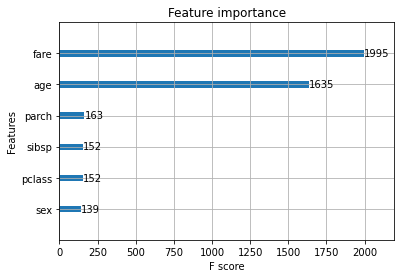

In [8]:
import matplotlib.pyplot as pyplot
plot_importance(model)

In [9]:
y_pred = model.predict(X_test)
y_true = y_test

In [10]:
acc = accuracy_score(y_true, y_pred)
acc

0.811704834605598

In [11]:
con_mat = confusion_matrix(y_true, y_pred)      # confusion_matrix()?
con_mat

array([[203,  37],
       [ 37, 116]], dtype=int64)

In [12]:
report = classification_report(y_true, y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.85      0.85      0.85       240
         1.0       0.76      0.76      0.76       153

    accuracy                           0.81       393
   macro avg       0.80      0.80      0.80       393
weighted avg       0.81      0.81      0.81       393

